In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import nltk
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
documents = pd.read_csv('../DATA/DATA.csv')

In [4]:
documents

,INDEX,TEXT
0,A001-00,Auto 001/00\n\nDEBIDO PROCESO DE TUTELA-Notifi...
1,A001-01,Auto 001/01\n\nNULIDAD SENTENCIA DE CONSTITUCI...
2,A001-02,Auto 001/02\n \nLEGITIMACION POR PASIVA EN TUT...
3,A001-03,Auto 001/03\n\nREFERENDO-Etapas de desarrollo ...
4,A001-04,Auto 001/04\n\nCONFLICTO DE COMPETENCIA EN TUT...
...,...,...
35732,T-999-08,Sentencia T-999/08\n\nDERECHO A LA SALUD COMO ...
35733,T-999-10,Sentencia T-999/10\n\nMUJER EMBARAZADA-Deber d...
35734,T-999-12,Sentencia T-999/12\n\n\nACCION DE TUTELA DE PE...
35735,T-999-99,Sentencia T-999/99\n\nDERECHO A LA SEGURIDAD S...


In [5]:
documents['INDEX'] = documents['INDEX'].str.upper()

In [6]:
documents["DOCUMENT_TYPE"] = [x.strip()[0] for x in documents.INDEX]

In [7]:
documents.columns.tolist()

['INDEX', 'TEXT', 'DOCUMENT_TYPE']

In [8]:
documents = documents[['INDEX','DOCUMENT_TYPE', 'TEXT']]

In [9]:
documents.DOCUMENT_TYPE.value_counts()

T    19378
A     9084
C     6843
S      431
E        1
Name: DOCUMENT_TYPE, dtype: int64

Text(0, 0.5, 'Conteo')

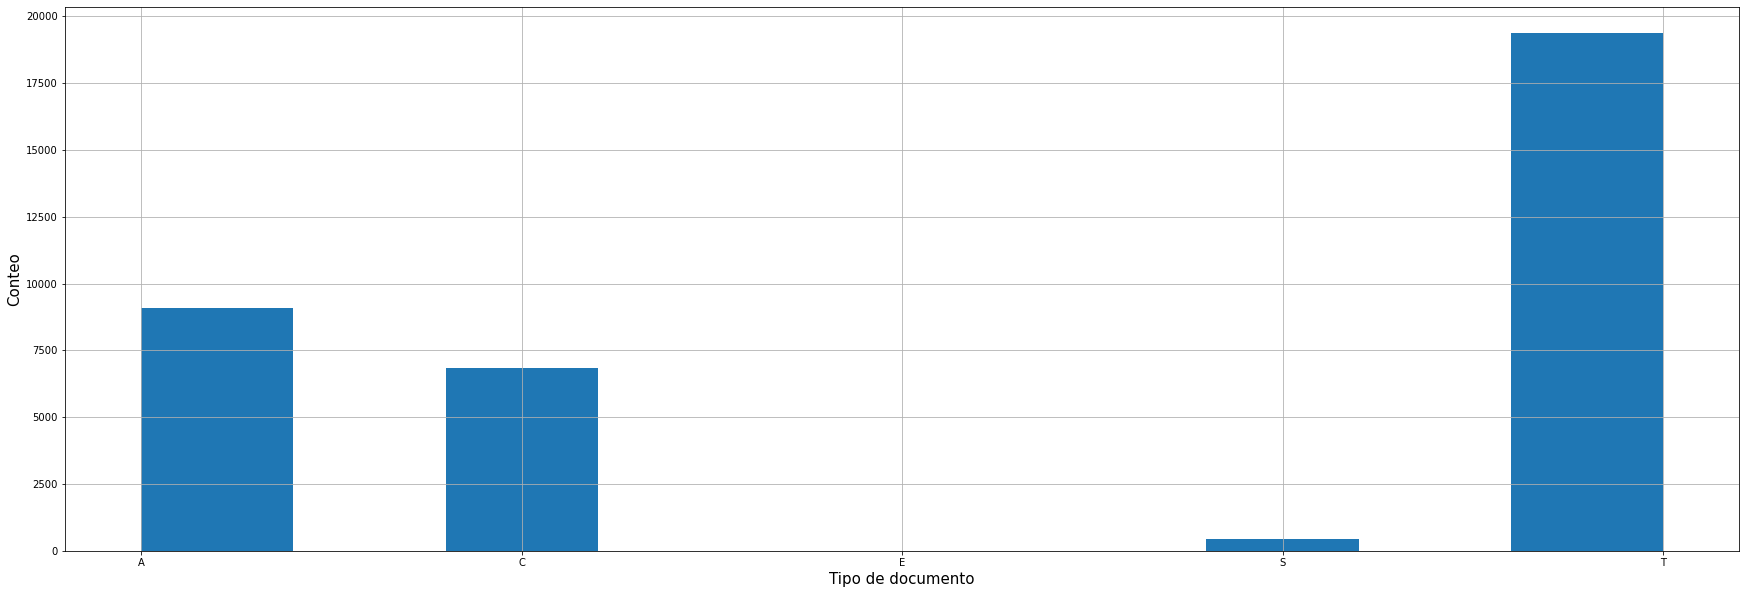

In [10]:
plt.figure(figsize=(30, 10))
documents['DOCUMENT_TYPE'].hist()
plt.xlabel("Tipo de documento", fontsize=15)
plt.ylabel("Conteo",fontsize=15)

In [11]:
def preprocessor_sentences(text):
    """
    preprocesador de texto con separación de frases por línea.
    """
    
    text = text.replace("\n", " ")
    text = text.replace("\xa0", "")
    text = text.replace("\x93", "")
    text = text.replace("\x94", "")
    text = text.replace("\r", "")
    text = text.replace("  ", " ")
    text = text.replace("   ", " ")
    text = text.replace("    ", " ")
    text = text.replace("     ", " ")
    text = text.replace("      ", " ")
    text = re.sub("\[([\s\S]*?)\]", "", text)
    
    return text

In [12]:
documents["TEXT_PLAIN"] = [preprocessor_sentences(str(x)) for x in tqdm(documents.TEXT)]

100%|██████████| 35737/35737 [00:31<00:00, 1125.45it/s]
C:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
documents

,INDEX,DOCUMENT_TYPE,TEXT,TEXT_PLAIN
0,A001-00,A,Auto 001/00\n\nDEBIDO PROCESO DE TUTELA-Notifi...,Auto 001/00 DEBIDO PROCESO DE TUTELA-Notificac...
1,A001-01,A,Auto 001/01\n\nNULIDAD SENTENCIA DE CONSTITUCI...,Auto 001/01 NULIDAD SENTENCIA DE CONSTITUCIONA...
2,A001-02,A,Auto 001/02\n \nLEGITIMACION POR PASIVA EN TUT...,Auto 001/02 LEGITIMACION POR PASIVA EN TUTELA...
3,A001-03,A,Auto 001/03\n\nREFERENDO-Etapas de desarrollo ...,Auto 001/03 REFERENDO-Etapas de desarrollo de ...
4,A001-04,A,Auto 001/04\n\nCONFLICTO DE COMPETENCIA EN TUT...,Auto 001/04 CONFLICTO DE COMPETENCIA EN TUTELA...
...,...,...,...,...
35732,T-999-08,T,Sentencia T-999/08\n\nDERECHO A LA SALUD COMO ...,Sentencia T-999/08 DERECHO A LA SALUD COMO GAR...
35733,T-999-10,T,Sentencia T-999/10\n\nMUJER EMBARAZADA-Deber d...,Sentencia T-999/10 MUJER EMBARAZADA-Deber del ...
35734,T-999-12,T,Sentencia T-999/12\n\n\nACCION DE TUTELA DE PE...,Sentencia T-999/12 ACCION DE TUTELA DE PERSON...
35735,T-999-99,T,Sentencia T-999/99\n\nDERECHO A LA SEGURIDAD S...,Sentencia T-999/99 DERECHO A LA SEGURIDAD SOCI...


In [ ]:
file_name = 'DATA_v0_1.csv'
documents.to_csv(file_name, encoding='utf-8', index= False)